## Background / Motivation

As movie lovers, we decided to investigate what factors impact a movie's financial success. We were also motivated to look at award-winning movies because it is Oscars season and we wanted to see if award success was related to movie grossing. Originally, we set out to tackle a classification problem, using the predictors in this Oscar's dataset to predict the likelihood of a movie winning Best Picture. Unfortunately, filtering the dataset for only Best Picture nominees did not supply us with enough data to adequately split the data into training and test and make meaningful predictions and inferences. Instead, we switched gears to focus on the continuous Gross variable and predict a movie's financial success using predictors such as rating, reviews, and award nominations. 

## Problem statement 

In this analysis, we sought to conduct both a prediction and inference investigation. First, we wanted to understand if we could build a model that would help our stakeholders (movie directors) predict how much revenue their movie was going to generate. Second, we wanted to better understand what movie characteristics contributed to overall gross revenue. The dataset we chose included many different metrics including information about the movie's release (release year, release month, day of week), information about the movie's contents (certificate, genre), ratings from consumers (user reviews, critic reviews), and awards from the Academy (votes, awards nominations, BAFTA wins, SAG wins). With so many variables included, we set out to explore different types of variables' impact on gross, possible multicollinearity and model assumptions, and ultimately create a model that can make predictions and inferences about gross revenue at a rate better than chance.

## Data sources

We utilized an open source dataset from Kaggle that contains movie data, from 2000 to 2017, about wins and nominations for many different annual award shows. It also contains information about genre, duration, rating, and other factors that we can examine. Here is the link to the dataset: https://www.kaggle.com/datasets/vipulgote4/oscars-nominated-movies-from-2000-to-2017

## Stakeholders

Our stakeholders fall into two categories: movie industry executives looking to make profits and movie enthusiasts looking for an interesting metric related to movie quality. The ability to predict gross revenue is more important to executives looking to make a profit but inference will also benefit their future endeavors. By focusing on more objective and substantial metrics related to gross revenue, they may be able to use our model to improve gross revenue, and thus, their profits. The movie industry is notoriously difficult to predict and this real world dataset also reflected that inherent chaos. In addition to providing a prediction of a movie's gross revenue, this project also provides new and interesting information about important characteristics of a successful movie. 

While there is more to a movie's popularity than its financial success, finances certainly matter to our executive stakeholders and they give enthusiasts interesting data to ponder. Therefore, our model could be incredibly valuable to movie executives.

## Data quality check / cleaning / preparation 

- There were some missing values in some of the columns that we were interested in using for our model, so we imputed each of these using the mean of the respective column. 
- We had to turn many columns that were not numeric into numeric columns for use in the model development and inference.
- Our original plan was to examine this dataset from a classification perspective and attempt to determine whether or not a certain movie would be likely to win an Oscar, so we turned many of the Oscar related columns in our dataset to numeric 1s and 0s rather than the categorical "Yes" or "No' options that were already present.
- We added a month column that was derived from the release date column.

Here is a look at the distribution of the variables used in our final inference and analysis.

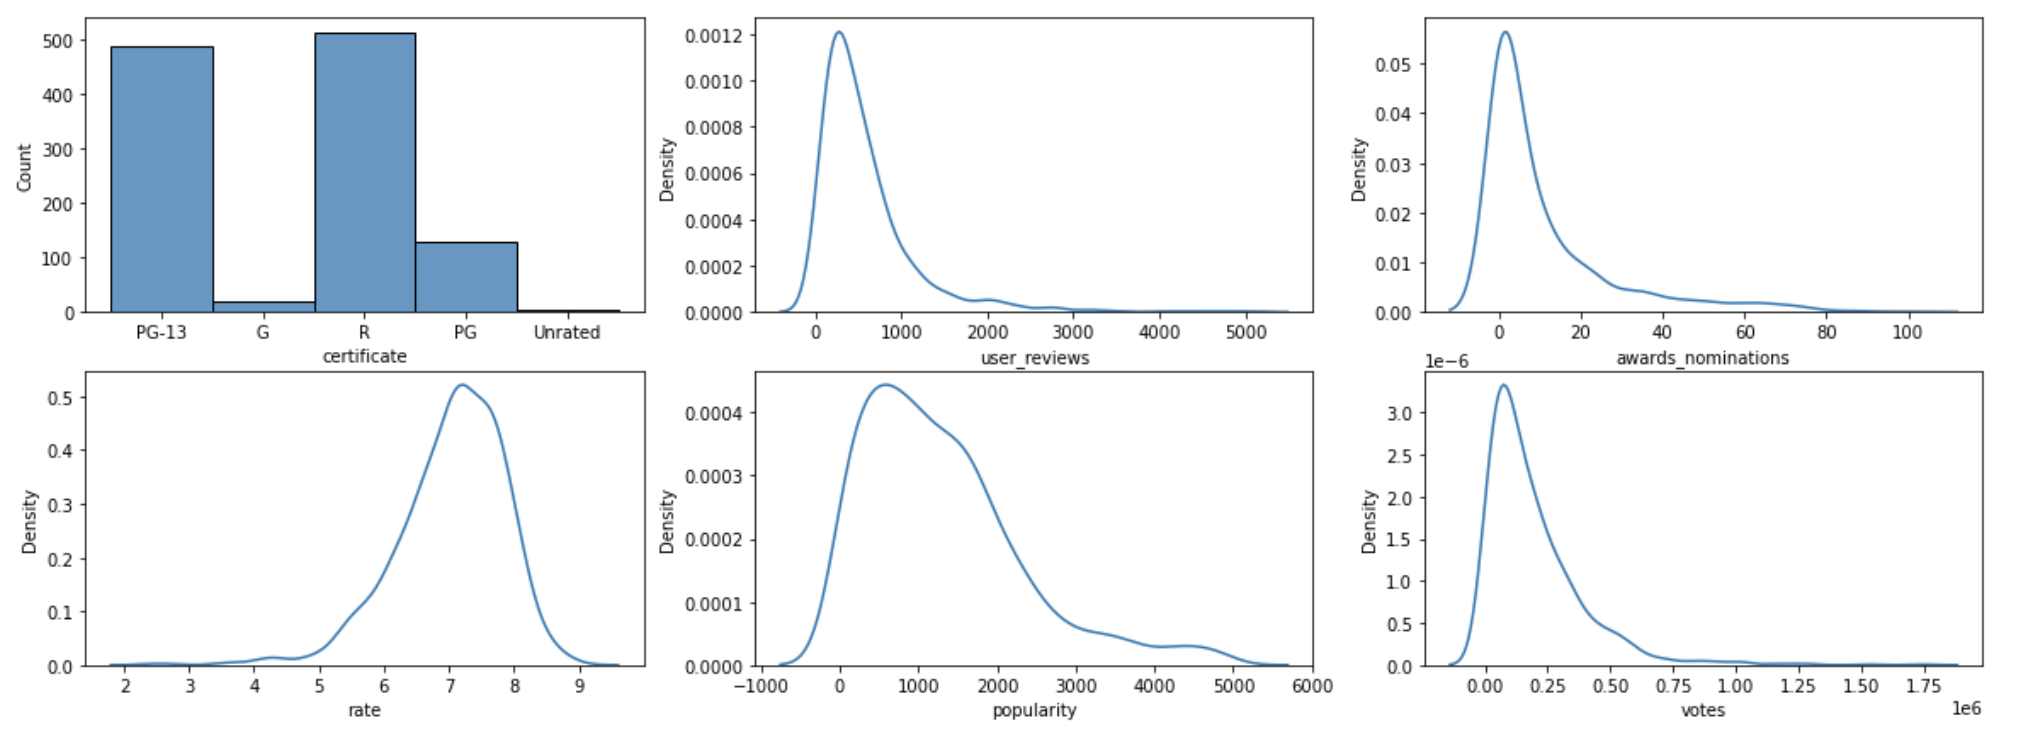

There are 7 observations with missing values for the "certificate" predictor.

## Exploratory data analysis

Here are graphs of the variables used in our final inference and analysis graphed against our predictor variable to examine any potential trends that could be expanded upon later.

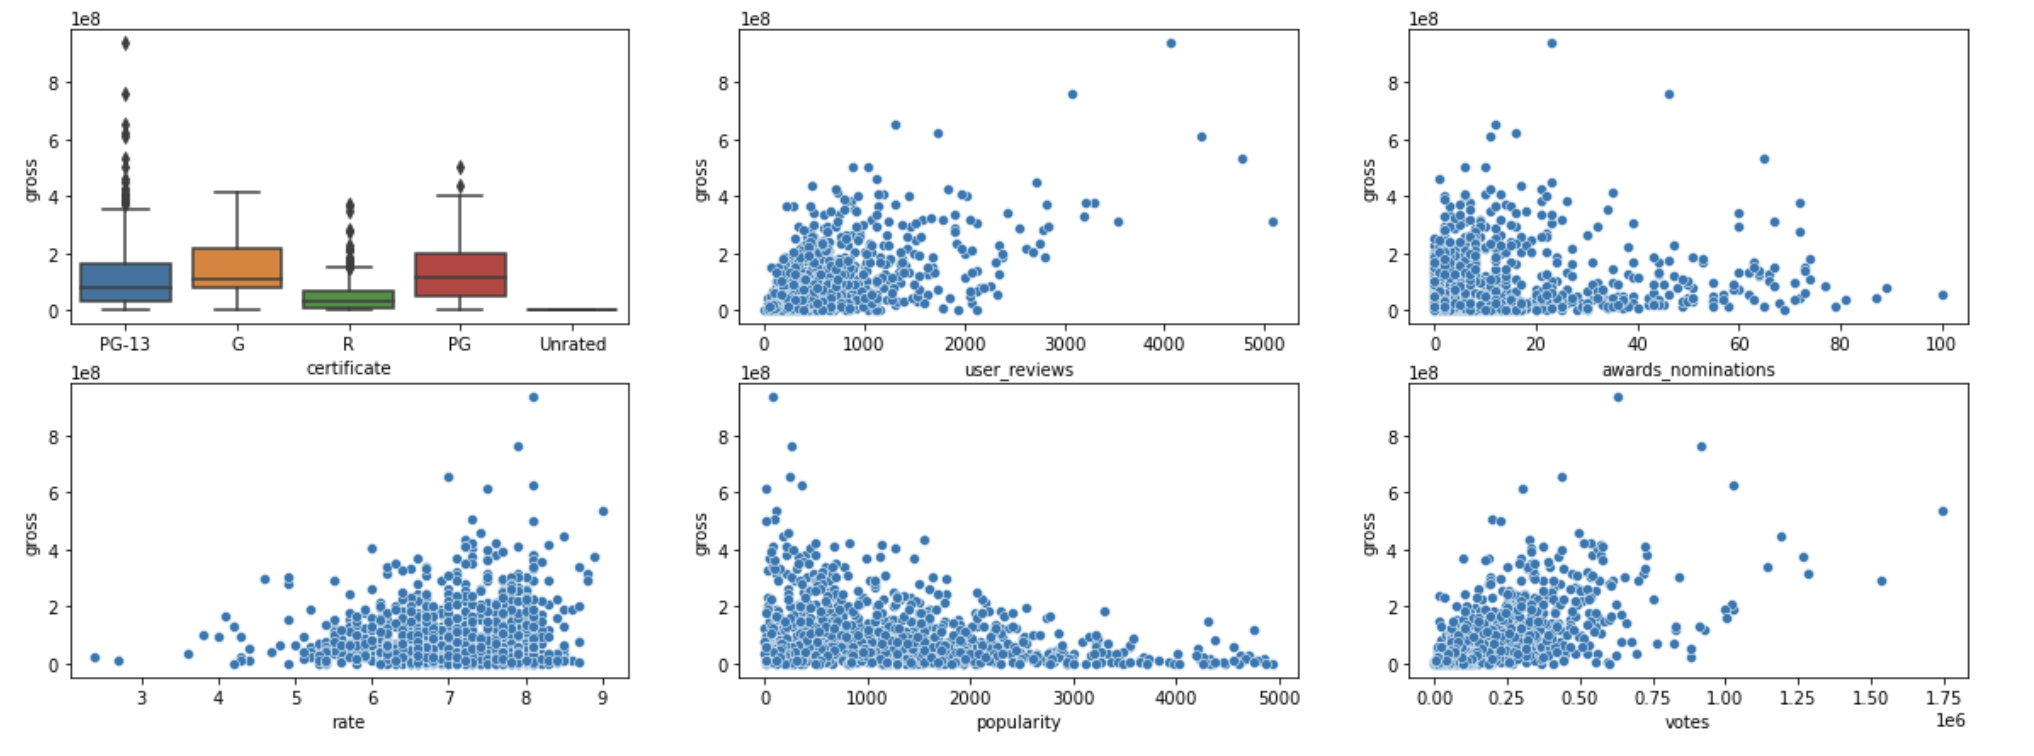

Beyond graphing our relevant predictors against the target, we graphed some of our predictors against each other to inform potential interaction terms in model development.

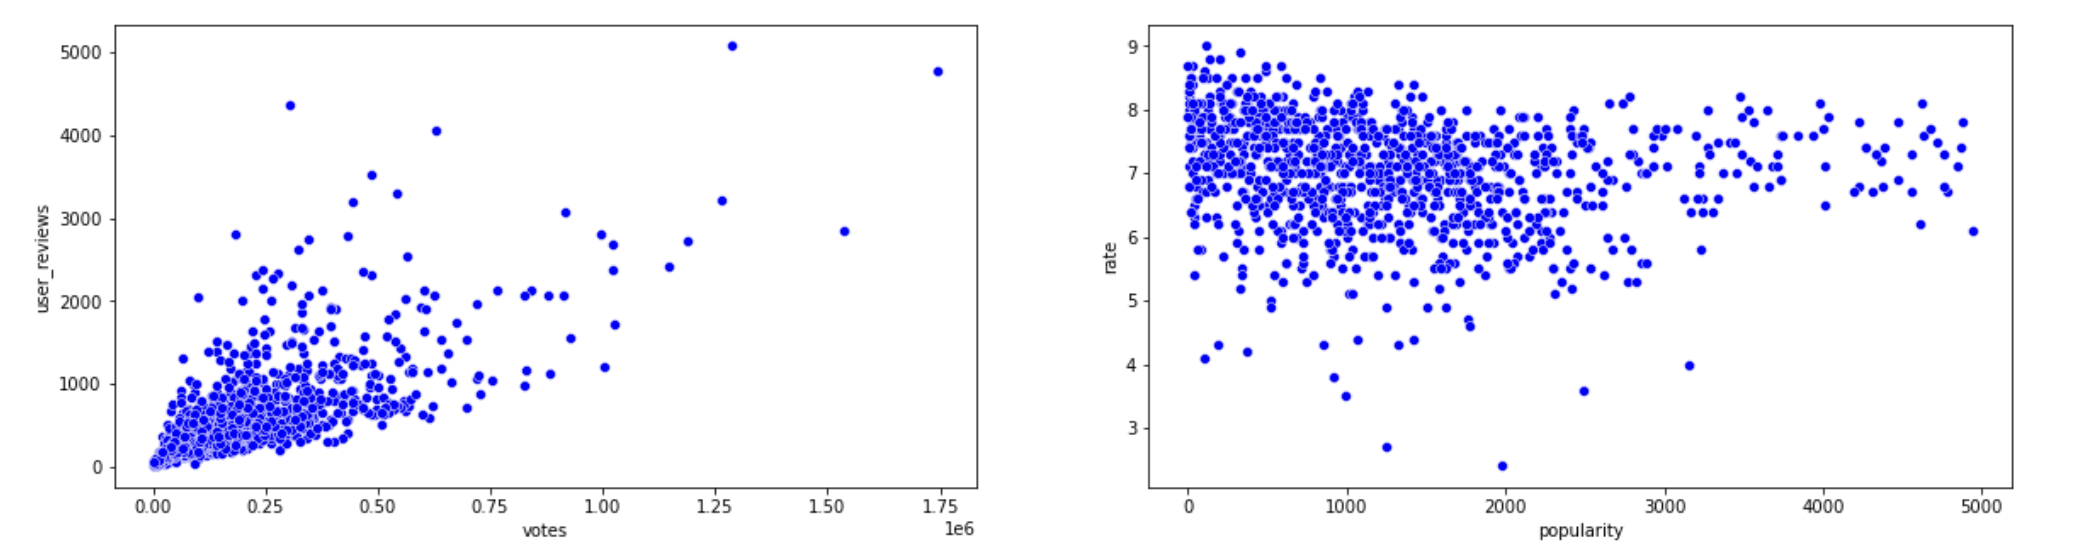

#### Insights from the EDA that were useful for the model:
- User reviews and votes were associated and we ended up using a significant interaction term between these predictors.
- The distribution of popularity seemed logarithmic in nature when graphed against gross. 
- The distribution of rate seemed exponential in nature when graphed against gross. 

## Approach

As mentioned above, we began our investigation by attempting a logistic classification of the probability of a movie winning the Oscars Best Picture category. We believed that having many variables in the dataset would allow us to create a robust model. However, this was not the case - we came up on many issues: 
1. Our decision to predict the probability of winning the Best Picture category restricted majority of the observations in our dataset because our dataset included movies that were nominated for all categories of awards.  Splitting this small dataset into two parts for testing made our model even weaker because it left us with only ~100 observations to build the model from. 
2. Many of the predictors were statistically insignificant despite working with interactions and transformations 
2. Most of our variables were inherently multicollinear since objectively good movies were likely to receive high ratings from multiple awards shows and objectively bad movies were likely to receive low ratings. 
Therefore, we decided to change our response variable and focus on a linear problem that wouldn't have as many issues. 

We chose to predict the total revenue of a movie and infer the most important influencers of gross revenue using a wide range of predictors. We thought this was a better response variable because objectively good movies do not necessarily need to be popular in the box office and objectively bad movies can be very popular in the box office. In short, there was more variance in the response variable and this made for a more meaningful prediction model. Additionally, we were able to use all the observations in the dataset (~1200 obs), which enabled a more robust model. 

We anticipated that our predictors would still be multicollinear. Therefore, we decided to use fewer predictors from a wide range of categories that would not be inherently related to each other, for example, the movie's age rating and the number of awards they were nominated for. 

Using these wide range of predictors we created a linear regression model. Our initial model was certainly not our final model, since it was not very strong, had a low R-squared and a very high RMSE (higher than the mean value for total revenue). After running interactions and transformations, we were able to improve the R-squared and the RMSE, atleast slightly. 

We decided to prioritize improving the R-squared over improving RMSE because we thought that R-squared was a more important performance metric for our model. 
1. Our response variable had a wide range of observations (characteristic of the movie industry) and we wanted to include the necessary predictors to explain the variation in the response instead of removing the extreme observations as outliers. 
2. We were also incentivized to use R-squared as our metric instead of RMSE because the randomly selected observations for the test dataset had a wider range of response values than the training dataset did. This meant that some test observations were outside the domain of x-values that the model had been trained on, and this likely meant that the predicted gross values for those observations was wrong. Since we were using RMSE instead of MAE, larger errors were penalized more than small errors, and this is likely why our RMSE was very high. 

Therefore, improving our model's explanatory power was more important than the precision of our model (described by RMSE). However, we still utilized our RMSE metric to compare against RSE and ensure that we did not face any overfitting issues. 

Note: we did not source our code from any public repositories or receive help from posted solutions on Kaggle.

## Developing the model

In the exploratory data analysis portion of this project, we observed correlation via pairplots in order to introduce interactions into the model and explored linearity assumptions to introduce important transformations. One important transformation ws the binning of the awards nominated predictor. We binned this predictor because we saw that many of the movies in the dataset had not won or had won very few awards - this is normal for the movie industry - and so, we wanted to group such movies together and see their effect on gross revenue. This was an important transformation because it produced statistically significant inferences, was statistically significant for our prediction, and was a way for us to incorporate our initial inspiration of predicting awards wins in our new model. 


To further develop the model, we utilized subset selection to make sure we were not missing any important variables in our model and further understand the capabilities of our model for inference and prediction.

First, we implemented forward selection without interactions. We included the relevant quantitative variables, those being duration, rate, metascore, votes, user_reviews, critic_reviews, popularity, awards_wins, awards_nominations and month. The decision to include these variables was based on our exploratory analysis and their relationships with the target variable gross. We tried to include only the most important predictor from different categories of movie characteristics (i.e. including award nominations without award wins due to collinearity concerns and lack of variation). Basing the best model choice off of the conservative BIC measure, forward selection produced a model with all 10 predictors. The R2 peaked at 7 predictors but 10 predictors made for better prediction. The R2 value of the best forward model was 0.442 and the RMSE was 79483673.65. This RMSE value was equivalent to the full model (all predictors included).

Next, we implemented best subset selection without interactions. We included the same columns as forward selection. Basing the best model choice off of the conservative BIC measure, best subset produced the same model as forward selection, one with all 10 predictors. The R2 peaked at 7 predictors but 10 predictors made for better prediction. The R2 value of the best forward model was 0.442 and the RMSE was 79483673.65. This RMSE value was equivalent to the full model and the forward selection model (all predictors included).

We decided to introduce interactions because both forward and best subset included all 10 predictors as the best subset. We included all 10 predictors from previous algorithms and multiplied then in pairs to create a total of 55 predictors. Utilizing the 55 predictors, we implemented forward selection to observe how its best model changed after introducing interactions. Basing the best model choice off of the conservative BIC measure, forward selection with interactions produced a model containing 46 predictors. The R2 peaked at 31 predictors. The R2 value of the forward selection model with interactions was 0.575 and the RMSE was 78580477.72. This RMSE value was less than the full, best subset, and forward selection models without interactions.

We then implemented backward subset selection with interactions to investigate the choice of model. Basing the best model choice off of the conservative BIC measure, backward selection with interactions produced a model containing 15 predictors. The R2 peaked at 35 predictors. The R2 value of the backward selection model with interactions was 0.547 and the RMSE was 77698578.61. This RMSE value was less than the full, best subset, and forward selection models with and without interactions.

Comparatively, we found that the model we'd produce through EDA still performed better for inference and prediction than any of the algorithmic models. The R2 of our EDA model was 0.563 and the RMSE was 69538200.00. Comparing these RMSE and R2 values helped us realize that the transformations and binning that informed our EDA model fit the data well and produced more accurate inference and prediction than subsetting could with the raw predictors and interactions. Developing these subsets allowed us to commit to our EDA model with certainty, understanding that our dataset contained multicollinearity that limited its capability for prediction, even when best subset was employed.

**Model Equation: 2.449e+08 - 4.749e+07(certificate PG) - 9.068e+07(certificate PG-13) - 1.338e+08(certificate R) - 4.591e-06(certificate unrated) + 3.512+07(awards 4-12) + 3.142e+07(awards 12-30) + 1.685e+07(awards 30-100) + 383.1921(votes) + 2.219e+04(user reviews) - 0.0196(votes * user reviews) - 3.707e+04(e^rate) - 1.459e+07(ln(popularity))**

Given the chance to extend our investigation, one way in which we could have improved our model would have been to scale the variables so that the small values of the predictor variables would not have seemed so insignificant compared to the large values of the response variable, gross. This may have helped our model respond to the wide range of data points.

## Limitations of the model with regard to inference / prediction

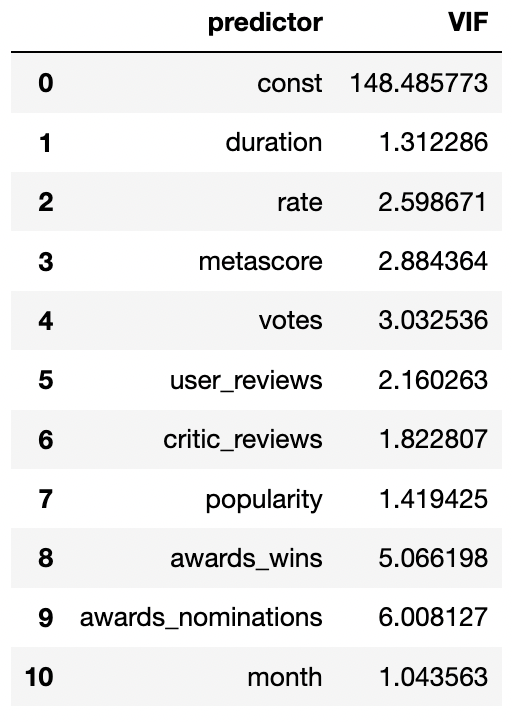

Our dataset contains many predictors that each relate to the quality of a movie in a unique way. Given most of the predictors govern quality, we understood that many of them would likely be correlated. From the start, we knew there would be a risk of severe collinearity associated with the Oscar movie dataset and interaction terms would not be enough to account for all of it. The VIF table shows low collinearity for most predictors and moderate collinearity for awards_wins and awards_nominations. The moderate collinearity between wins and nominations was taken into account to some degree by including nominations without wins in the model. Overall, we can conclude from the VIF values of the quantitative predictors that there is low to moderate collinearity between many of the predictors included in our model. Collinearity affects our capability for inference and has an affect on the possible R-squared values we could hope to achieve. Understanding the collinearity that is present in our dataset helps set our expectations a bit lower for how much this real world dataset can achieve from an inference standpoint and allows us to focus on the statistical signficance of the predictors and overall model as another metric.

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

Our dataset had real-world values that were not tailored to run a prediction and inference model, and thus, we needed to accept a relatively low R-squared. That being said, we worked hard to find the optimized R-squared by playing with our predictors and were able to land on an explanatory value of 0.571 or 57.1%. This means that our model was able to explain 57.1% of the variation in the response variable, gross revenue. We also ran algorithms such as best subset and forward selection to find the optimal set of predictors, and landed on the original set of predictors we had chosen. Therefore, based on this model, we have two key recommendations for movie directors hoping to maximize their profit.
1. The age rating, the number of awards nominations, and the general category of user feedback (user reviews, user ratings, popularity ratings) all together provide the best prediction of gross revenue. These are the factors that movie directors need to consider when predicting how much revenue and profit the movie will make. 
2. Inferring from our model:
   - having 4-12 awards nominations has the greatest positive influence on gross revenue. While having 12-30 awards nominations also has a similar strength of influence, having more than 30 does not provide nearly the same return on investment and is not worth the effort. Having fewer than 4 awards is also detrimental to gross revenue. Therefore, we recommend aiming to be nominated for between 4 and 12 awards, and movie directors may do this by appealing to the preferences of certain awards shows or aiming to be nominated for a particular category at multiple awards shows - there are nearly 25 awards shows every year, each with their own list of categories that the movie can get nominated for. 
   - an R rated movie has the strongest negative influence on gross revenue. This is likely because it restricts the viewership base the most strictly of all ratings and affects the volume of tickets that can be sold in theaters. Our recommendation would be to avoid shooting scenes that may result in an R-rating for the movie.

## GitHub and individual contribution {-}

GitHub link: https://github.com/mgbanich/DS303-2_ElectricBoogaloo

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Jackson Baker</td>
    <td>Data cleaning and EDA, Assumptions and interactions</td>
    <td>Cleaned data to impute missing values and choose most relevant columns for investigation. Changed data type of some columns for effective use and added month columns. Examined variable distributions prior to beginning with the model. Developed visualizations to identify appropriate variable transformations and interactions. Checked and addressed modeling assumptions.</td>
    <td>12</td>
</tr>
    <tr>
    <td>Tanya Venkatesh</td>
    <td>Outlier and influential points treatment, binning awards_nominations, producing the model</td>
    <td>Identified outliers/influential points and removed them from model. Created binned predictor variable to use in model. Created the linear model based on the EDA conclusions and made all predictors statistically significant. </td>
    <td>5</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

We faced many challenges when using GitHub, namely the order of commits, communication of commits between team members, and simply understanding the web and desktop user interfaces. We had to create a new repository because of commit conflicts. Since we were not able to understand GitHub till the end of our project, we collaborated in person for much of this project and did not work as independently as described in the table above. While we contributed and committed to the GitHub repo according to the details above, we worked as a team in exploring the data (EDA) and in producing the best model with the right variables.

While we were able to understand how to use GitHub and how to communicate our commits by the end of our project, we think that GitHub did not facilitate communication better than working in person all together.